In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
sns.set()

## Data Preprocessing

In [2]:
#import file
df = pd.read_csv("loan_data_2007_2014.csv", index_col=0, low_memory=False)

In [3]:
#copy version
loan_data = df.copy()

In [4]:
#check the data / head tail

loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#change max columns 
pd.options.display.max_columns = None

In [6]:
loan_data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773xx,TX,19.85,0.0,Apr-03,2.0,NaN,NaN,18.0,0.0,23208,77.6,36.0,w,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.0,0.0,0.0,Jan-16,432.64,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,294998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,78000.0,Verified,Jan-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,377xx,TN,18.45,0.0,Jun-97,5.0,NaN,116.0,18.0,1.0,18238,46.3,30.0,f,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.0,0.0,0.0,Dec-14,17.50,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,221830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,7 years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/06/13 > I am going to c...,debt_consolidation,Debt consolidation,458xx,OH,25.65,0.0,Dec-01,2.0,65.0,NaN,18.0,0.0,6688,51.1,43.0,f,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.0,0.0,0.0,Jan-16,514.34,Feb-16,Dec-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,73598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,3 years,OWN,83000.0,Verified,Jan-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,913xx,CA,5.39,3.0,Feb-03,1.0,13.0,NaN,21.0,0.0,11404,21.5,27.0,w,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.0,0.0,0.0,Dec-14,1500.68,NaN,Apr-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,591610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN
466284,9199665,11061576,10000,10000,9975.0,36 months,19.20,367.58,D,D3,NaN,10+ years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/04/13 > I will like a l...,other,Other,950xx,CA,22.78,1.0,Feb-00,0.0,9.0,NaN,6.0,0.0,11325,70.8,22.0,f,3984.38,3974.41,8821.620000,8799.57,6015.62,2806.00,0.0,0.0,0.0,Jan-16,367.58,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,57477.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,NaN,NaN


In [7]:
#check data dtypes
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [8]:
#term change to numerical
#emp_length change to numerical
#issue_d change to datetime
#earliest_cr_line change to datetime


loan_data['term'][:10]

0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
5     36 months
6     60 months
7     36 months
8     60 months
9     60 months
Name: term, dtype: object

In [9]:
#remove months, convert terms to numerical value

loan_data['term_int'] = loan_data['term'].str.replace(' months','')

In [10]:
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])

In [11]:
loan_data['term_int'][:10]

0    36
1    60
2    36
3    36
4    60
5    36
6    60
7    36
8    60
9    60
Name: term_int, dtype: int64

In [12]:
loan_data['emp_length'][:10]

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
5      3 years
6      8 years
7      9 years
8      4 years
9     < 1 year
Name: emp_length, dtype: object

In [13]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [14]:
loan_data['emp_length'].value_counts(dropna=False)

10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
NaN           21008
9 years       17888
Name: emp_length, dtype: int64

In [15]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace(' years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', '0')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('\+','')

In [16]:
loan_data['emp_length_int'].value_counts(dropna=False)

10     150049
2       41373
3       36596
0       36265
5       30774
1       29622
4       28023
7       26180
6       26112
8       22395
NaN     21008
9       17888
Name: emp_length_int, dtype: int64

In [17]:
#convert to numerical
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'], errors='coerce')

In [18]:
loan_data['emp_length_int'].value_counts(dropna=False)

10.0    150049
2.0      41373
3.0      36596
0.0      36265
5.0      30774
1.0      29622
4.0      28023
7.0      26180
6.0      26112
8.0      22395
NaN      21008
9.0      17888
Name: emp_length_int, dtype: int64

In [19]:
loan_data['issue_d'][:10]

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
5    Dec-11
6    Dec-11
7    Dec-11
8    Dec-11
9    Dec-11
Name: issue_d, dtype: object

In [20]:
#need months since loans were issued, assume today = 12/1/2017
#create new feature 'mths_since_issue_d'

loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - pd.to_datetime(loan_data['issue_d'], format='%b-%y'))/ np.timedelta64(1,'M')))

In [21]:
#verify - min/max (data that stands out)
loan_data['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [22]:
#earliest_cr_line change to datetime
loan_data['earliest_cr_line'][:10]

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
5    Nov-04
6    Jul-05
7    Jan-07
8    Apr-04
9    Sep-04
Name: earliest_cr_line, dtype: object

In [23]:
#need months since earliest credit line was issued 
#create new feature - 'mths_since_earliest_cr_line'

loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - pd.to_datetime(loan_data['earliest_cr_line'], format='%b-%y'))/ np.timedelta64(1,'M')))

In [24]:
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [25]:
#investigate - min is negative 612 months

loan_data.loc[loan_data['mths_since_earliest_cr_line'] <0][['earliest_cr_line', 'mths_since_earliest_cr_line']][:10]

,earliest_cr_line,mths_since_earliest_cr_line
1580,Sep-62,-537.0
1770,Sep-68,-609.0
2799,Sep-64,-561.0
3282,Sep-67,-597.0
3359,Feb-65,-566.0
3413,Jun-67,-594.0
3607,Aug-67,-596.0
3989,Dec-63,-552.0
4440,Sep-68,-609.0
4449,Sep-68,-609.0


In [26]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format='%b-%y')

In [27]:
loan_data.loc[loan_data['mths_since_earliest_cr_line'] <0][['earliest_cr_line', 'earliest_cr_line_date','mths_since_earliest_cr_line']][:10]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0
3413,Jun-67,2067-06-01,-594.0
3607,Aug-67,2067-08-01,-596.0
3989,Dec-63,2063-12-01,-552.0
4440,Sep-68,2068-09-01,-609.0
4449,Sep-68,2068-09-01,-609.0


In [28]:
#earliest_cr_line_date - 1962 vs 2062 
#rather than removing or converting individual line, replace with the max diff 

loan_data['mths_since_earliest_cr_line'] = np.where(loan_data['mths_since_earliest_cr_line'] <0, loan_data['mths_since_earliest_cr_line'].max(), loan_data['mths_since_earliest_cr_line'])

In [29]:
loan_data['mths_since_earliest_cr_line'].describe() #no material change within the mean 

count    466256.000000
mean        242.385374
std          86.460310
min          73.000000
25%         184.000000
50%         226.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [30]:
#convert discrete to dummies
#grade, sub_grade, home_ownership, verification_status, loan_status, purpose, addr_state, initial_list_status

loan_data['grade'][:10]

0    B
1    C
2    C
3    C
4    B
5    A
6    C
7    E
8    F
9    B
Name: grade, dtype: object

In [31]:
dummies_list = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'initial_list_status'
]
loan_data_dummies = []
for i in dummies_list:
    loan_data_dummies.append(pd.get_dummies(loan_data[i], prefix=i, prefix_sep=':'))
    

In [32]:
loan_data_dummies

[        grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G
 0             0        1        0        0        0        0        0
 1             0        0        1        0        0        0        0
 2             0        0        1        0        0        0        0
 3             0        0        1        0        0        0        0
 4             0        1        0        0        0        0        0
 ...         ...      ...      ...      ...      ...      ...      ...
 466280        0        0        1        0        0        0        0
 466281        0        0        0        1        0        0        0
 466282        0        0        0        1        0        0        0
 466283        1        0        0        0        0        0        0
 466284        0        0        0        1        0        0        0
 
 [466285 rows x 7 columns],
         sub_grade:A1  sub_grade:A2  sub_grade:A3  sub_grade:A4  sub_grade:A5  \
 0                  0             0  

In [33]:
loan_data_dummies = pd.concat(loan_data_dummies, axis=1)

In [34]:
loan_data_dummies

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [35]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis=1)

In [36]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Columns: 205 entries, id to initial_list_status:w
dtypes: datetime64[ns](1), float64(49), int64(7), object(22), uint8(126)
memory usage: 340.6+ MB


In [37]:
#not all of the columns are displayed - verbose=True
loan_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 205 columns):
 #   Column                                                           Dtype         
---  ------                                                           -----         
 0   id                                                               int64         
 1   member_id                                                        int64         
 2   loan_amnt                                                        int64         
 3   funded_amnt                                                      int64         
 4   funded_amnt_inv                                                  float64       
 5   term                                                             object        
 6   int_rate                                                         float64       
 7   installment                                                      float64       
 8   grade                            

In [38]:
pd.options.display.max_rows=250
loan_data.isnull().sum()

id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                                                          0
annual_inc                            

In [39]:
loan_data.columns.to_list()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [40]:
loan_data['total_rev_hi_lim'].isnull().sum()

70276

In [41]:
#impute with funded_amnt

loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace=True)

In [42]:
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [43]:
loan_data['annual_inc'].isnull().sum()

4

In [44]:
#impute using the mean annual_inc

loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)

In [45]:
loan_data['annual_inc'].isnull().sum()

0

In [46]:
#fill missing values with 0
fill_val=['mths_since_earliest_cr_line','acc_now_delinq','total_acc','pub_rec','open_acc','inq_last_6mths','delinq_2yrs',
 'emp_length_int']

for i in fill_val:
    loan_data[i].fillna(0, inplace=True)

In [47]:
for i in fill_val:
    print(i, loan_data[i].isnull().sum())

mths_since_earliest_cr_line 0
acc_now_delinq 0
total_acc 0
pub_rec 0
open_acc 0
inq_last_6mths 0
delinq_2yrs 0
emp_length_int 0


## Data Prep for PD Model

In [48]:
#determine loan_status is the dependent variable
#feature that determines borrower's status - whether good/bad borrower 
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [49]:
#determine which statuses falls under good or bad borrower
#check the loan_status

loan_data['loan_status'].value_counts(dropna=False)

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [50]:
loan_data['loan_status'].value_counts(dropna=False) / loan_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [51]:
#assign 0 for bad, 1 for good 

loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off','Late (31-120 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off' ]), 0, 1)

In [52]:
loan_data['good_bad'].value_counts(dropna=False)

1    415317
0     50968
Name: good_bad, dtype: int64

## Data Preparation

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [54]:
#loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test 
#X_train, X_test, y_train, y_test

loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis=1), loan_data['good_bad'], random_state=42, test_size=0.2)

In [55]:
print(loan_data_inputs_train.shape)
print(loan_data_inputs_test.shape)
print(loan_data_targets_train.shape)
print(loan_data_targets_test.shape)

(373028, 205)
(93257, 205)
(373028,)
(93257,)


In [56]:
df_inputs_prepr = loan_data_inputs_train
df_targets_prepr = loan_data_targets_train

In [57]:
df_inputs_prepr['grade'].unique()

array(['A', 'C', 'D', 'B', 'E', 'F', 'G'], dtype=object)

In [58]:
#groupby 'grade' for each good_bad dependent 

pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis=1)

,grade,good_bad
427211,A,1
206088,C,1
136020,A,1
412305,D,0
36159,C,0
...,...,...
259178,B,1
365838,B,1
131932,B,1
146867,B,1


In [59]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis=1)
df1.head()

,grade,good_bad
427211,A,1
206088,C,1
136020,A,1
412305,D,0
36159,C,0


In [60]:
df1_count = df1.groupby('grade', as_index=False)['good_bad'].count() #good_bad by count
df1_count

,grade,good_bad
0,A,59759
1,B,109730
2,C,100245
3,D,61498
4,E,28612
5,F,10530
6,G,2654


In [61]:
df1_mean = df1.groupby('grade', as_index=False)['good_bad'].mean()  #good_bad by % (mean)
df1_mean

,grade,good_bad
0,A,0.961044
1,B,0.921015
2,C,0.885770
3,D,0.846304
4,E,0.805257
5,F,0.754416
6,G,0.727958


In [62]:
df1 = pd.merge(df1_count, df1_mean, on='grade' , )

In [63]:
df1

,grade,good_bad_x,good_bad_y
0,A,59759,0.961044
1,B,109730,0.921015
2,C,100245,0.885770
3,D,61498,0.846304
4,E,28612,0.805257
5,F,10530,0.754416
6,G,2654,0.727958


In [64]:
df1.columns = ['grade', 'n_obs', 'prop_good_bad']
df1

,grade,n_obs,prop_good_bad
0,A,59759,0.961044
1,B,109730,0.921015
2,C,100245,0.885770
3,D,61498,0.846304
4,E,28612,0.805257
5,F,10530,0.754416
6,G,2654,0.727958


In [65]:
#prop_good

df1['n_obs_%'] = df1['n_obs'] / df1['n_obs'].sum()
df1

,grade,n_obs,prop_good_bad,n_obs_%
0,A,59759,0.961044,0.160200
1,B,109730,0.921015,0.294160
2,C,100245,0.885770,0.268733
3,D,61498,0.846304,0.164862
4,E,28612,0.805257,0.076702
5,F,10530,0.754416,0.028228
6,G,2654,0.727958,0.007115


In [66]:
df1['n_good'] = df1['n_obs'] * df1['prop_good_bad']
df1['n_bad'] =  df1['n_obs'] * (1-df1['prop_good_bad'])
df1

,grade,n_obs,prop_good_bad,n_obs_%,n_good,n_bad
0,A,59759,0.961044,0.160200,57431.0,2328.0
1,B,109730,0.921015,0.294160,101063.0,8667.0
2,C,100245,0.885770,0.268733,88794.0,11451.0
3,D,61498,0.846304,0.164862,52046.0,9452.0
4,E,28612,0.805257,0.076702,23040.0,5572.0
5,F,10530,0.754416,0.028228,7944.0,2586.0
6,G,2654,0.727958,0.007115,1932.0,722.0


In [67]:
df1['%_good'] = df1['n_good'] / df1['n_good'].sum()
df1['%_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1

,grade,n_obs,prop_good_bad,n_obs_%,n_good,n_bad,%_good,%_bad
0,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090
1,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541
2,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792
4,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642
5,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417
6,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706


In [68]:
#woe
df1['woe'] = np.log(df1['%_good'] / df1['%_bad'])
df1

,grade,n_obs,prop_good_bad,n_obs_%,n_good,n_bad,%_good,%_bad,woe
0,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830
1,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476
2,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843
4,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267
5,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440
6,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459


In [69]:
#information value
df1['iv'] = df1['woe'] * (df1['%_good'] - df1['%_bad'])
df1['iv'] = df1['iv'].sum()
df1

,grade,n_obs,prop_good_bad,n_obs_%,n_good,n_bad,%_good,%_bad,woe,iv
0,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.288636
1,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.288636
2,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.288636
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.288636
4,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.288636
5,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.288636
6,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,0.288636


In [70]:
df1 = df1.sort_values(by='woe', ascending=True)
df1

,grade,n_obs,prop_good_bad,n_obs_%,n_good,n_bad,%_good,%_bad,woe,iv
6,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,0.288636
5,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.288636
4,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.288636
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.288636
2,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.288636
1,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.288636
0,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.288636


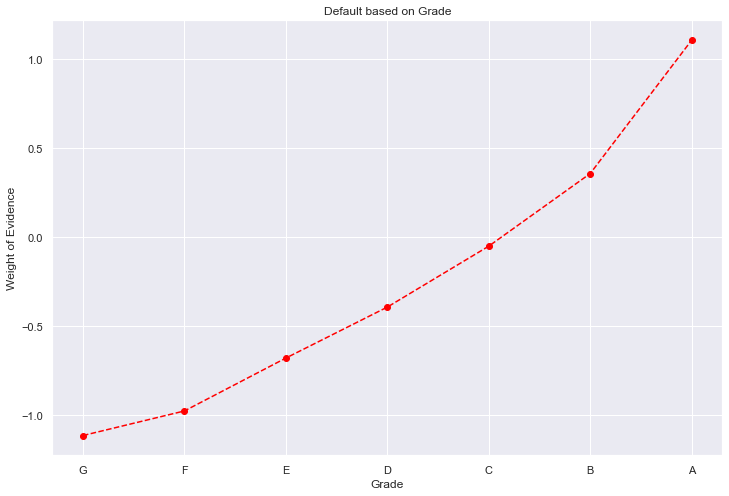

In [71]:
plt.figure(figsize=(12,8))
plt.plot(df1['grade'], df1['woe'], ls='--', marker='o', color='red')
plt.title('Default based on Grade')
plt.xlabel('Grade')
plt.ylabel('Weight of Evidence')
plt.show()

In [72]:
def discrete_woe(X_train, y_train, variable):
    df1 = pd.concat([X_train[variable], y_train], axis=1)
   
    df1_count = df1.groupby(variable, as_index=False)['good_bad'].count()
    df1_mean = df1.groupby(variable, as_index=False)['good_bad'].mean()
    
    df1 = pd.merge(df1_count, df1_mean, on=variable)
    df1.columns=[df1.columns[0], 'n_obs', 'prop_good_bad']
    
    df1['n_obs_%'] = df1['n_obs'] / df1['n_obs'].sum()
    df1['n_good'] = df1['n_obs'] * df1['prop_good_bad']
    df1['n_bad'] =  df1['n_obs'] * (1-df1['prop_good_bad'])
    df1['%_good'] = df1['n_good'] / df1['n_good'].sum()
    df1['%_bad'] = df1['n_bad'] / df1['n_bad'].sum()
    df1['woe'] = np.log(df1['%_good'] / df1['%_bad'])
    df1['iv'] = df1['woe'] * (df1['%_good'] - df1['%_bad'])
    df1['iv'] = df1['iv'].sum()
    df1 = df1.sort_values(by='woe', ascending=True)
    return df1

In [73]:
df_temp = discrete_woe(df_inputs_prepr, df_targets_prepr, 'grade')
df_temp

,grade,n_obs,prop_good_bad,n_obs_%,n_good,n_bad,%_good,%_bad,woe,iv
6,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,0.288636
5,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.288636
4,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.288636
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.288636
2,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.288636
1,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.288636
0,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.288636


In [74]:
df_temp.columns[-2]

'woe'

In [75]:
def woe_graph(df, rot=0):
    x = np.array(df.iloc[:,0].apply(str))
    y = df['woe']
    plt.figure(figsize=(18,4))
    plt.plot(x, y, ls='--', marker='o', color='red')
    plt.title('Default based on ' + df.columns[0], fontdict={'size':20})
    plt.xlabel(df.columns[0])
    plt.xticks(rotation=rot)
    plt.ylabel('Weight of Evidence')
    plt.show()

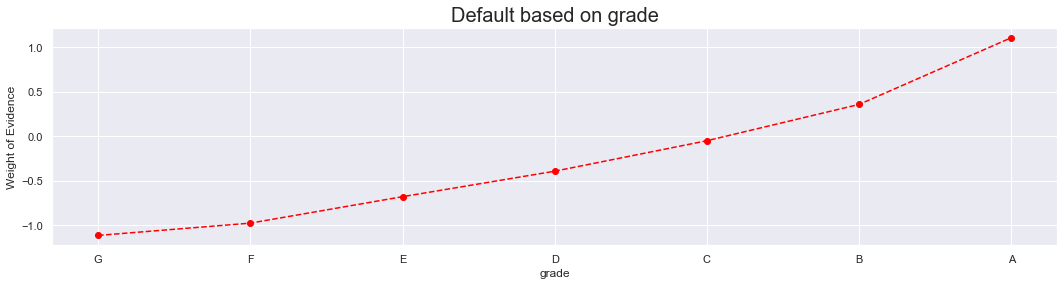

In [76]:
woe_graph(df_temp)

In [77]:
df_temp = discrete_woe(df_inputs_prepr, df_targets_prepr, 'home_ownership')
df_temp

,home_ownership,n_obs,prop_good_bad,n_obs_%,n_good,n_bad,%_good,%_bad,woe,iv
3,OTHER,137,0.795620,0.000367,109.0,28.0,0.000328,0.000687,-0.738602,inf
2,NONE,40,0.850000,0.000107,34.0,6.0,0.000102,0.000147,-0.363144,inf
5,RENT,150599,0.873870,0.403720,131604.0,18995.0,0.396099,0.465815,-0.162123,inf
4,OWN,33295,0.892536,0.089256,29717.0,3578.0,0.089442,0.087743,0.019170,inf
1,MORTGAGE,188956,0.903835,0.506546,170785.0,18171.0,0.514026,0.445608,0.142834,inf
0,ANY,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,inf


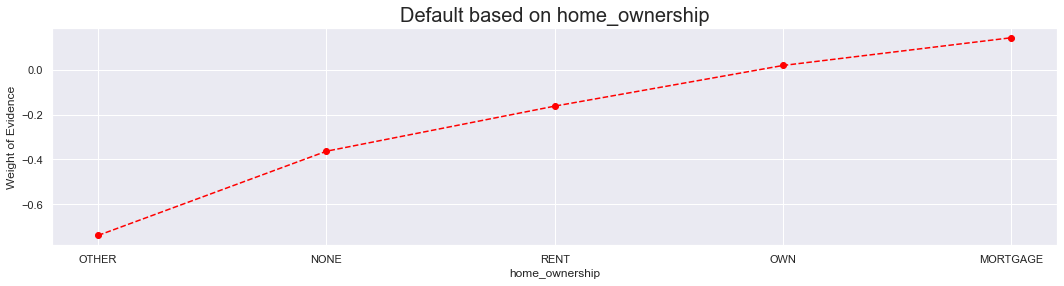

In [78]:
woe_graph(df_temp)

In [79]:
#woe for any is inf - n_obs =1 and n_bad = 0
#NONE, OTHER and ANY have very small n_obs hence next lowest woe belongs to RENT
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = np.where(df_inputs_prepr['home_ownership'].isin(['RENT','OTHER','NONE','ANY']), 1,0)


In [80]:
df_temp = discrete_woe(df_inputs_prepr, df_targets_prepr, 'addr_state')
df_temp

,addr_state,n_obs,prop_good_bad,n_obs_%,n_good,n_bad,%_good,%_bad,woe,iv
28,NE,13,0.461538,0.000035,6.0,7.0,0.000018,0.000172,-2.251896,inf
12,IA,13,0.769231,0.000035,10.0,3.0,0.000030,0.000074,-0.893772,inf
32,NV,5221,0.864585,0.013996,4514.0,707.0,0.013586,0.017338,-0.243837,inf
9,FL,25211,0.875808,0.067585,22080.0,3131.0,0.066456,0.076782,-0.144425,inf
11,HI,2001,0.877061,0.005364,1755.0,246.0,0.005282,0.006033,-0.132852,inf
1,AL,4671,0.877328,0.012522,4098.0,573.0,0.012334,0.014052,-0.130376,inf
31,NM,2075,0.883373,0.005563,1833.0,242.0,0.005517,0.005935,-0.072973,inf
44,VA,11366,0.883864,0.030470,10046.0,1320.0,0.030236,0.032370,-0.068202,inf
33,NY,32211,0.883984,0.086350,28474.0,3737.0,0.085701,0.091643,-0.067037,inf
35,OK,3284,0.884287,0.008804,2904.0,380.0,0.008740,0.009319,-0.064072,inf


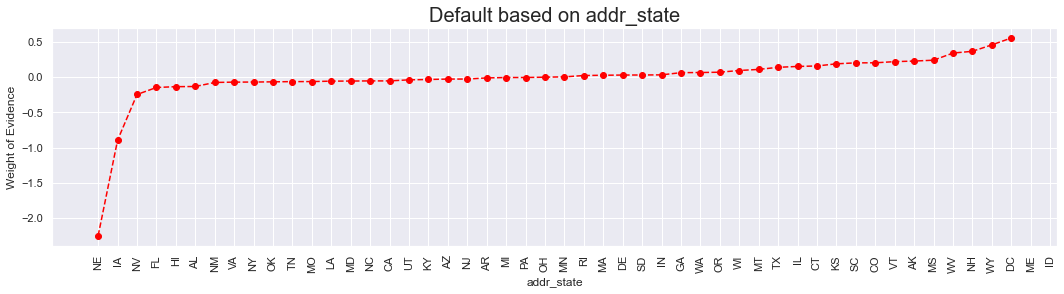

In [81]:
woe_graph(df_temp, rot=90)

In [82]:
#North Dakota is missing

if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

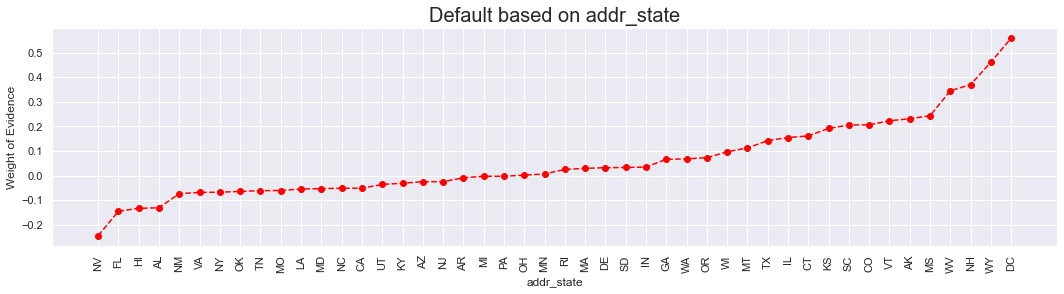

In [83]:
#ND
#NE and IA - extremely lower woe 
#ME and ID - extremely higher woe

#replot by excluding these 4

df_temp = df_temp[2:-2]
woe_graph(df_temp, rot=90)

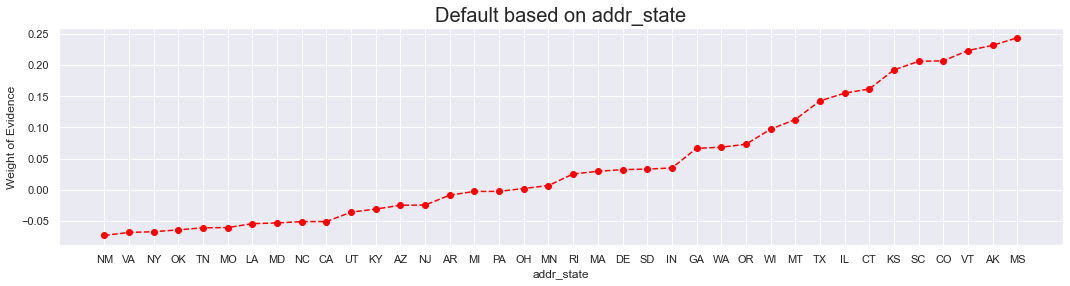

In [84]:
df_temp = discrete_woe(df_inputs_prepr, df_targets_prepr, 'addr_state')
woe_graph(df_temp[6:-6])

In [85]:
#ND - no obs
#NE,IA - very small obs 
#NV to AL - NV small obs and FL to AL very similar woe
df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], 
                                                         df_inputs_prepr['addr_state:NE'],
                                                          df_inputs_prepr['addr_state:IA'],
                                                          df_inputs_prepr['addr_state:NV'],
                                                          df_inputs_prepr['addr_state:FL'],
                                                          df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

In [86]:
#NM to NY very similar but NY has very large obs hence NY needs to remain separate
df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'],
                                          df_inputs_prepr['addr_state:VA']])

In [87]:
#OK to CA very similar woe but CA has very large obs like NY hence CA needs to remain separate 
df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'],
                                                      df_inputs_prepr['addr_state:TN'],
                                                       df_inputs_prepr['addr_state:MO'],
                                                       df_inputs_prepr['addr_state:LA'],
                                                       df_inputs_prepr['addr_state:MD'],
                                                       df_inputs_prepr['addr_state:NC']
                                                      ])

In [88]:
#UT to NJ similar
df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'],
                                                 df_inputs_prepr['addr_state:KY'],
                                                 df_inputs_prepr['addr_state:AZ'],
                                                 df_inputs_prepr['addr_state:NJ']])

In [89]:
#AR to MN
df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'],
                                                       df_inputs_prepr['addr_state:MI'],
                                                       df_inputs_prepr['addr_state:PA'],
                                                       df_inputs_prepr['addr_state:OH'],
                                                       df_inputs_prepr['addr_state:MN']
                                                      ])

In [90]:
#RI to IN
df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'],
                                                       df_inputs_prepr['addr_state:MA'],
                                                       df_inputs_prepr['addr_state:DE'],
                                                       df_inputs_prepr['addr_state:SD'],
                                                       df_inputs_prepr['addr_state:IN']
                                                      ])


In [91]:
#GA to OR
df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'],
                                          df_inputs_prepr['addr_state:WA'],
                                             df_inputs_prepr['addr_state:OR']])

In [92]:
#WI, MT
#TX alone

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'],
                                          df_inputs_prepr['addr_state:MT']])

In [93]:
#IL, CT
df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'],
                                          df_inputs_prepr['addr_state:CT']])

In [94]:
#KS to MS
df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'],
                                                      df_inputs_prepr['addr_state:SC'],
                                                       df_inputs_prepr['addr_state:CO'],
                                                       df_inputs_prepr['addr_state:VT'],
                                                       df_inputs_prepr['addr_state:AK'],
                                                       df_inputs_prepr['addr_state:MS']
                                                      ])

In [95]:
#WV to ID

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'],
                                                      df_inputs_prepr['addr_state:NH'],
                                                       df_inputs_prepr['addr_state:WY'],
                                                       df_inputs_prepr['addr_state:DC'],
                                                       df_inputs_prepr['addr_state:ME'],
                                                       df_inputs_prepr['addr_state:ID']
                                                      ])

In [96]:
#verification_status, 'purpose' and 'initial_list_status'

df_temp = discrete_woe(df_inputs_prepr, df_targets_prepr, 'verification_status')
df_temp

,verification_status,n_obs,prop_good_bad,n_obs_%,n_good,n_bad,%_good,%_bad,woe,iv
2,Verified,134414,0.872781,0.360332,117314.0,17100.0,0.353090,0.419344,-0.171969,0.020384
1,Source Verified,120030,0.895918,0.321772,107537.0,12493.0,0.323663,0.306366,0.054922,0.020384
0,Not Verified,118584,0.905679,0.317896,107399.0,11185.0,0.323248,0.274290,0.164232,0.020384


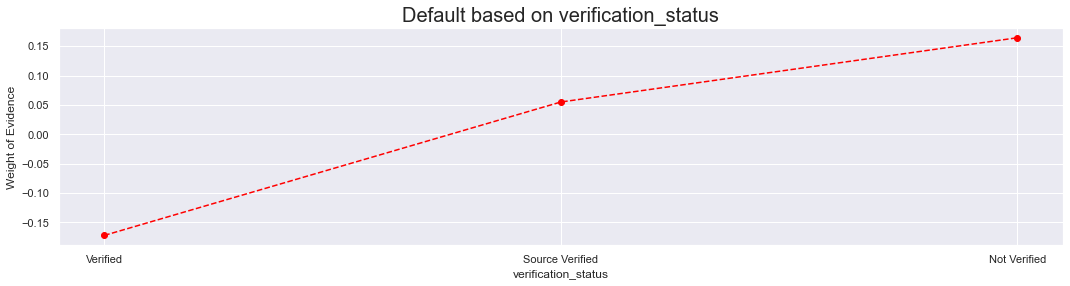

In [97]:
woe_graph(df_temp) #based on the result - no grouping needed

In [98]:
df_temp = discrete_woe(df_inputs_prepr, df_targets_prepr, 'purpose')
df_temp

,purpose,n_obs,prop_good_bad,n_obs_%,n_good,n_bad,%_good,%_bad,woe,iv
11,small_business,5582,0.786098,0.014964,4388.0,1194.0,0.013207,0.029280,-0.796180,0.035418
3,educational,333,0.801802,0.000893,267.0,66.0,0.000804,0.001619,-0.700151,0.035418
8,moving,2392,0.839465,0.006412,2008.0,384.0,0.006044,0.009417,-0.443493,0.035418
5,house,1830,0.860109,0.004906,1574.0,256.0,0.004737,0.006278,-0.281547,0.035418
9,other,18884,0.862264,0.050624,16283.0,2601.0,0.049008,0.063784,-0.263519,0.035418
10,renewable_energy,281,0.864769,0.000753,243.0,38.0,0.000731,0.000932,-0.242270,0.035418
7,medical,3684,0.868350,0.009876,3199.0,485.0,0.009628,0.011894,-0.211300,0.035418
13,wedding,1887,0.881823,0.005059,1664.0,223.0,0.005008,0.005469,-0.087937,0.035418
12,vacation,1991,0.882471,0.005337,1757.0,234.0,0.005288,0.005738,-0.081703,0.035418
2,debt_consolidation,219183,0.886884,0.587578,194390.0,24793.0,0.585071,0.607999,-0.038440,0.035418


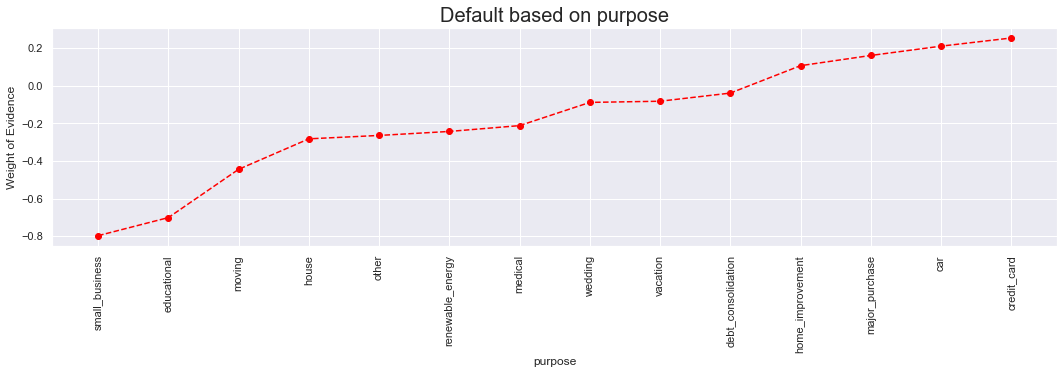

In [99]:
woe_graph(df_temp, rot=90)

In [100]:
#small_business, educational, moving
#house, other, renewable_energy, medical
#wedding, vacation
#debt_consolidation
#home_improvement, major_purchase, car
#credit_card

df_inputs_prepr['purpose:small_b_edu_moving'] = sum([df_inputs_prepr['purpose:small_business'],
                                                    df_inputs_prepr['purpose:educational'],
                                                    df_inputs_prepr['purpose:moving']])

df_inputs_prepr['purpose:house_other_ren_en_med'] = sum([df_inputs_prepr['purpose:house'],
                                                        df_inputs_prepr['purpose:other'],
                                                        df_inputs_prepr['purpose:renewable_energy'],
                                                        df_inputs_prepr['purpose:medical']])

df_inputs_prepr['purpose:wedd_vaca'] = sum([df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:vacation']])

df_inputs_prepr['purpose:home_imp_maj_pur_car'] = sum([df_inputs_prepr['purpose:home_improvement'],
                                                      df_inputs_prepr['purpose:major_purchase'],
                                                      df_inputs_prepr['purpose:car']])

In [101]:
df_temp = discrete_woe(df_inputs_prepr, df_targets_prepr, 'initial_list_status')
df_temp

,initial_list_status,n_obs,prop_good_bad,n_obs_%,n_good,n_bad,%_good,%_bad,woe,iv
0,f,242514,0.879694,0.650123,213338.0,29176.0,0.642101,0.715484,-0.108214,0.02478
1,w,130514,0.911105,0.349877,118912.0,11602.0,0.357899,0.284516,0.229461,0.02478


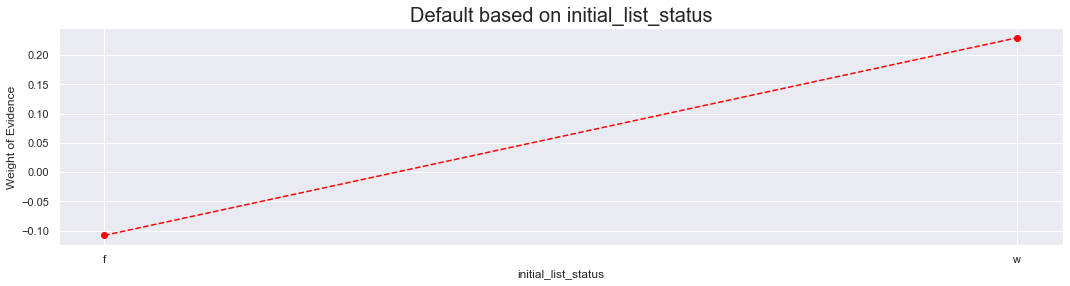

In [102]:
woe_graph(df_temp) #no change required

In [103]:
#discrete_woe for continuous variables - no sorting 

def continuous_woe(X_train, y_train, variable):
    df1 = pd.concat([X_train[variable], y_train], axis=1)
   
    df1_count = df1.groupby(variable, as_index=False)['good_bad'].count()
    df1_mean = df1.groupby(variable, as_index=False)['good_bad'].mean()
    
    df1 = pd.merge(df1_count, df1_mean, on=variable)
    df1.columns=[df1.columns[0], 'n_obs', 'prop_good_bad']
    
    df1['n_obs_%'] = df1['n_obs'] / df1['n_obs'].sum()
    df1['n_good'] = df1['n_obs'] * df1['prop_good_bad']
    df1['n_bad'] =  df1['n_obs'] * (1-df1['prop_good_bad'])
    df1['%_good'] = df1['n_good'] / df1['n_good'].sum()
    df1['%_bad'] = df1['n_bad'] / df1['n_bad'].sum()
    df1['woe'] = np.log(df1['%_good'] / df1['%_bad'])
    df1['iv'] = df1['woe'] * (df1['%_good'] - df1['%_bad'])
    df1['iv'] = df1['iv'].sum()
    #df1 = df1.sort_values(by='woe', ascending=True)
    return df1

In [104]:
#term_int - variable

loan_data_inputs_train['term_int'].value_counts()

36    270419
60    102609
Name: term_int, dtype: int64

In [105]:
df_temp = continuous_woe(df_inputs_prepr, df_targets_prepr, 'term_int')
df_temp

,term_int,n_obs,prop_good_bad,n_obs_%,n_good,n_bad,%_good,%_bad,woe,iv
0,36,270419,0.902995,0.724929,244187.0,26232.0,0.73495,0.643288,0.133209,0.039434
1,60,102609,0.858239,0.275071,88063.0,14546.0,0.26505,0.356712,-0.297009,0.039434


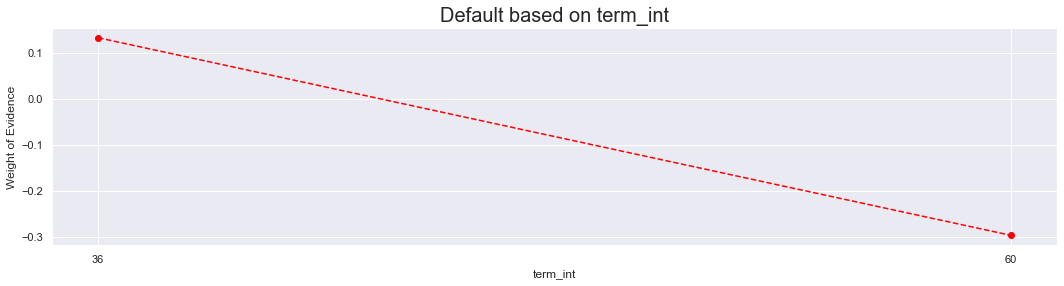

In [106]:
woe_graph(df_temp)

In [107]:
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int']==36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int']==60), 1, 0)

In [108]:
#emp_length_int

df_inputs_prepr['emp_length_int'].value_counts()

10.0    120245
0.0      45720
2.0      33078
3.0      29205
5.0      24602
1.0      23654
4.0      22468
7.0      21049
6.0      20887
8.0      17853
9.0      14267
Name: emp_length_int, dtype: int64

In [109]:
#in categories, so no fine classing needed

df_temp = continuous_woe(df_inputs_prepr, df_targets_prepr, 'emp_length_int')
df_temp

,emp_length_int,n_obs,prop_good_bad,n_obs_%,n_good,n_bad,%_good,%_bad,woe,iv
0,0.0,45720,0.876400,0.122565,40069.0,5651.0,0.120599,0.138580,-0.138975,0.006506
1,1.0,23654,0.886996,0.063411,20981.0,2673.0,0.063148,0.065550,-0.037329,0.006506
2,2.0,33078,0.890955,0.088674,29471.0,3607.0,0.088701,0.088455,0.002785,0.006506
3,3.0,29205,0.890772,0.078292,26015.0,3190.0,0.078299,0.078228,0.000907,0.006506
4,4.0,22468,0.890644,0.060231,20011.0,2457.0,0.060229,0.060253,-0.000404,0.006506
5,5.0,24602,0.884725,0.065952,21766.0,2836.0,0.065511,0.069547,-0.059790,0.006506
6,6.0,20887,0.883899,0.055993,18462.0,2425.0,0.055567,0.059468,-0.067862,0.006506
7,7.0,21049,0.887453,0.056427,18680.0,2369.0,0.056223,0.058095,-0.032759,0.006506
8,8.0,17853,0.889878,0.047860,15887.0,1966.0,0.047816,0.048212,-0.008245,0.006506
9,9.0,14267,0.886662,0.038246,12650.0,1617.0,0.038074,0.039654,-0.040660,0.006506


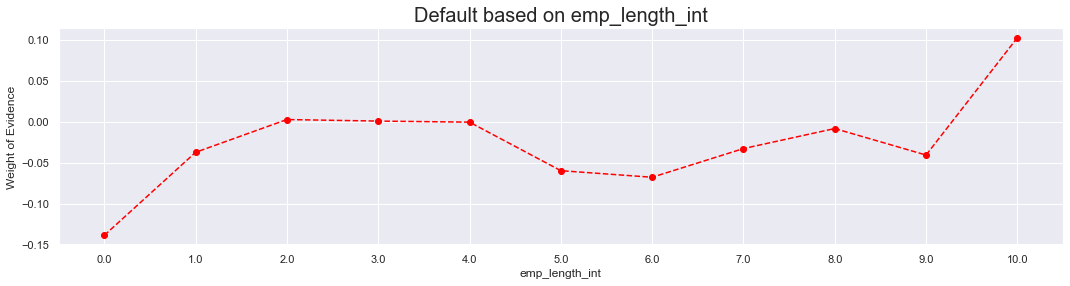

In [110]:
woe_graph(df_temp)

In [111]:
#0, 1, 2 to 4, 5-6, 7-9, 10 

df_inputs_prepr['emp_lenght_int:0'] = np.where((df_inputs_prepr['emp_length_int']==0), 1,0)
df_inputs_prepr['emp_lenght_int:1'] = np.where((df_inputs_prepr['emp_length_int']==1), 1,0)
df_inputs_prepr['emp_lenght_int:2_4'] = np.where((df_inputs_prepr['emp_length_int'].isin(range(2,5))), 1,0)
df_inputs_prepr['emp_lenght_int:5_6'] = np.where((df_inputs_prepr['emp_length_int'].isin(range(5,7))), 1,0)
df_inputs_prepr['emp_lenght_int:7_9'] = np.where((df_inputs_prepr['emp_length_int'].isin(range(7,10))), 1,0)
df_inputs_prepr['emp_lenght_int:10'] = np.where((df_inputs_prepr['emp_length_int']==10), 1, 0)

In [112]:
#months_since_issue_date
len(df_inputs_prepr['mths_since_issue_d'].unique())

91

In [113]:
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)

In [114]:
df_inputs_prepr['mths_since_issue_d_factor']

427211      (43.2, 45.0]
206088      (63.0, 64.8]
136020      (52.2, 54.0]
412305      (43.2, 45.0]
36159     (100.8, 102.6]
               ...      
259178     (35.91, 37.8]
365838      (41.4, 43.2]
131932      (52.2, 54.0]
146867      (55.8, 57.6]
121958      (52.2, 54.0]
Name: mths_since_issue_d_factor, Length: 373028, dtype: category
Categories (50, interval[float64]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [115]:
df_temp = continuous_woe(df_inputs_prepr, df_targets_prepr, 'mths_since_issue_d_factor')
df_temp

,mths_since_issue_d_factor,n_obs,prop_good_bad,n_obs_%,n_good,n_bad,%_good,%_bad,woe,iv
0,"(35.91, 37.8]",28170,0.942244,0.075517,26543.0,1627.0,0.079889,0.039899,0.694283,0.113186
1,"(37.8, 39.6]",39636,0.928424,0.106255,36799.0,2837.0,0.110757,0.069572,0.464979,0.113186
2,"(39.6, 41.4]",38614,0.917284,0.103515,35420.0,3194.0,0.106606,0.078327,0.308258,0.113186
3,"(41.4, 43.2]",29038,0.908603,0.077844,26384.0,2654.0,0.079410,0.065084,0.198945,0.113186
4,"(43.2, 45.0]",28367,0.901787,0.076045,25581.0,2786.0,0.076993,0.068321,0.119498,0.113186
5,"(45.0, 46.8]",12165,0.899301,0.032611,10940.0,1225.0,0.032927,0.030041,0.091740,0.113186
6,"(46.8, 48.6]",24451,0.898900,0.065547,21979.0,2472.0,0.066152,0.060621,0.087315,0.113186
7,"(48.6, 50.4]",22969,0.888328,0.061574,20404.0,2565.0,0.061412,0.062902,-0.023972,0.113186
8,"(50.4, 52.2]",20640,0.880523,0.055331,18174.0,2466.0,0.054700,0.060474,-0.100350,0.113186
9,"(52.2, 54.0]",18312,0.866863,0.049090,15874.0,2438.0,0.047777,0.059787,-0.224240,0.113186


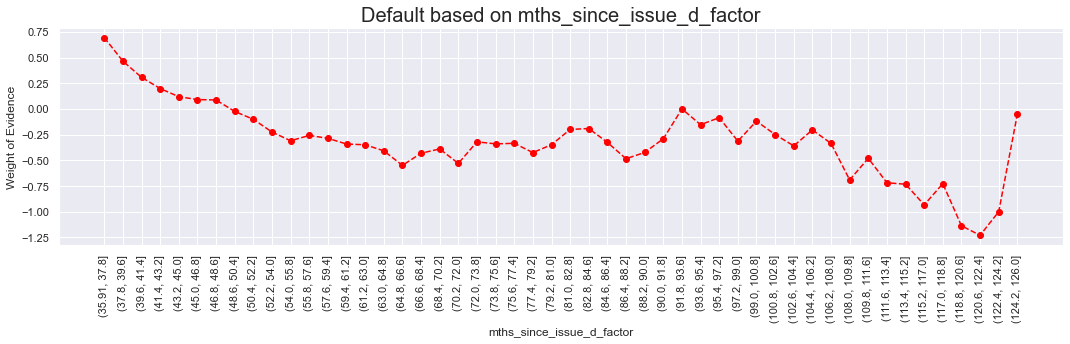

In [116]:
woe_graph(df_temp, rot=90)

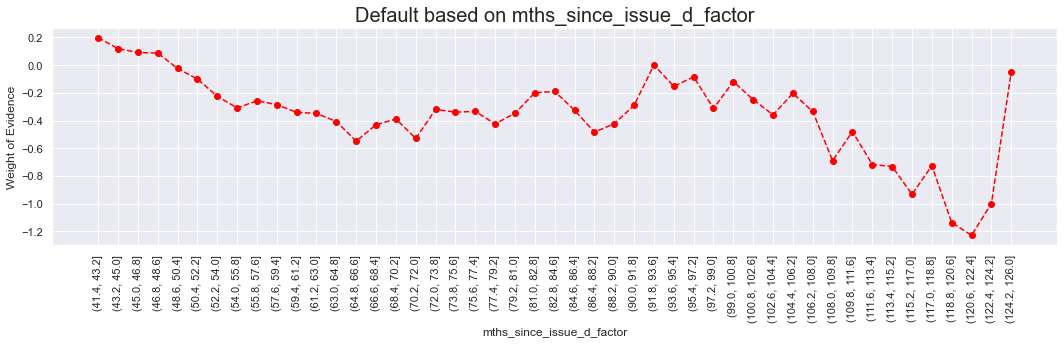

In [117]:
#first 3 categories have very diff woe and large n_obs_%
#run woe_graph without the first 3

woe_graph(df_temp.iloc[3:, :], rot=90)

In [118]:
#less than 38
#38 < x < 40
#40 < x < 41
#41 < x < 43
#43 < x < 49
#49 < x < 52
#52 < x < 59
#59 < x < 72
#72 < x 

#total of 9 categories
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1,0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38,40)), 1,0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40,42)), 1,0)
df_inputs_prepr['mths_since_issue_d:42-43']= np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42,44)), 1,0)
df_inputs_prepr['mths_since_issue_d:44-49']= np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(44,50)), 1,0)
df_inputs_prepr['mths_since_issue_d:50-52']= np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(50,53)), 1,0)
df_inputs_prepr['mths_since_issue_d:53-59']= np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53,60)), 1,0)
df_inputs_prepr['mths_since_issue_d:60-72']= np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(60, 73)), 1,0)
df_inputs_prepr['mths_since_issue_d:>72']= np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(73, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1,0)

In [119]:
#interest rate

df_inputs_prepr['int_rate'].value_counts()

12.99    12622
10.99    11893
15.61    10389
8.90      9135
16.29     8471
         ...  
16.83        1
17.78        1
17.46        1
17.09        1
17.41        1
Name: int_rate, Length: 504, dtype: int64

In [120]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
df_inputs_prepr['int_rate_factor']

427211      (8.722, 9.135]
206088    (14.089, 14.502]
136020      (8.722, 9.135]
412305    (16.566, 16.978]
36159      (12.438, 12.85]
                ...       
259178       (8.31, 8.722]
365838     (12.438, 12.85]
131932    (14.089, 14.502]
146867    (10.786, 11.199]
121958    (11.199, 11.612]
Name: int_rate_factor, Length: 373028, dtype: category
Categories (50, interval[float64]): [(5.399, 5.833] < (5.833, 6.246] < (6.246, 6.658] < (6.658, 7.071] ... (24.409, 24.822] < (24.822, 25.234] < (25.234, 25.647] < (25.647, 26.06]]

In [121]:
df_temp = continuous_woe(df_inputs_prepr, df_targets_prepr, 'int_rate_factor')
df_temp

,int_rate_factor,n_obs,prop_good_bad,n_obs_%,n_good,n_bad,%_good,%_bad,woe,iv
0,"(5.399, 5.833]",785,0.961783,0.002104,755.0,30.0,0.002272,0.000736,1.127775,0.343349
1,"(5.833, 6.246]",8459,0.980376,0.022677,8293.0,166.0,0.024960,0.004071,1.813434,0.343349
2,"(6.246, 6.658]",7826,0.971505,0.020980,7603.0,223.0,0.022883,0.005469,1.431381,0.343349
3,"(6.658, 7.071]",1816,0.973018,0.004868,1767.0,49.0,0.005318,0.001202,1.487473,0.343349
4,"(7.071, 7.484]",3143,0.976456,0.008426,3069.0,74.0,0.009237,0.001815,1.627297,0.343349
5,"(7.484, 7.897]",12581,0.962324,0.033727,12107.0,474.0,0.036439,0.011624,1.142587,0.343349
6,"(7.897, 8.31]",9687,0.949314,0.025969,9196.0,491.0,0.027678,0.012041,0.832335,0.343349
7,"(8.31, 8.722]",6594,0.965271,0.017677,6365.0,229.0,0.019157,0.005616,1.227103,0.343349
8,"(8.722, 9.135]",9539,0.937415,0.025572,8942.0,597.0,0.026913,0.014640,0.608852,0.343349
9,"(9.135, 9.548]",6681,0.963928,0.017910,6440.0,241.0,0.019383,0.005910,1.187742,0.343349


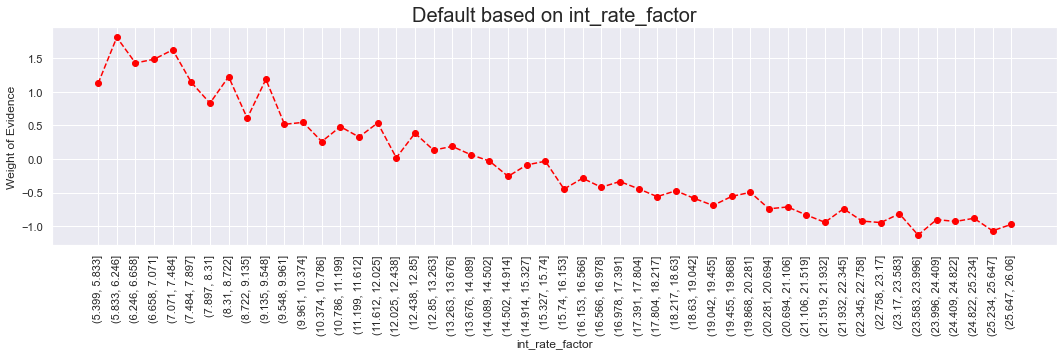

In [122]:
woe_graph(df_temp, rot=90)

In [123]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate']<=9.548), 1,0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate']>9.548) &(df_inputs_prepr['int_rate']<=12.025), 1,0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate']>12.025) &(df_inputs_prepr['int_rate']<=15.74), 1,0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate']>15.74) &(df_inputs_prepr['int_rate']<=20.281), 1,0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate']>=20.281), 1,0)

In [124]:
#funded_amount

df_inputs_prepr['funded_amnt'].value_counts()

10000    26180
12000    20399
15000    18669
20000    18091
35000    13186
         ...  
32900        1
28825        1
32150        1
34325        1
33775        1
Name: funded_amnt, Length: 1344, dtype: int64

In [125]:
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
df_inputs_prepr['funded_amnt_factor'].unique()

[(23960.0, 24650.0], (9470.0, 10160.0], (19820.0, 20510.0], (17060.0, 17750.0], (8090.0, 8780.0], ..., (23270.0, 23960.0], (31550.0, 32240.0], (28790.0, 29480.0], (28100.0, 28790.0], (33620.0, 34310.0]]
Length: 50
Categories (50, interval[float64]): [(465.5, 1190.0] < (1190.0, 1880.0] < (1880.0, 2570.0] < (2570.0, 3260.0] ... (32240.0, 32930.0] < (32930.0, 33620.0] < (33620.0, 34310.0] < (34310.0, 35000.0]]

In [126]:
df_temp = continuous_woe(df_inputs_prepr, df_targets_prepr, 'funded_amnt_factor')
df_temp

,funded_amnt_factor,n_obs,prop_good_bad,n_obs_%,n_good,n_bad,%_good,%_bad,woe,iv
0,"(465.5, 1190.0]",1224,0.905229,0.003281,1108.0,116.0,0.003335,0.002845,0.158977,0.014139
1,"(1190.0, 1880.0]",3028,0.903897,0.008117,2737.0,291.0,0.008238,0.007136,0.143549,0.014139
2,"(1880.0, 2570.0]",6018,0.893819,0.016133,5379.0,639.0,0.016190,0.015670,0.032608,0.014139
3,"(2570.0, 3260.0]",7248,0.889073,0.019430,6444.0,804.0,0.019395,0.019717,-0.016440,0.014139
4,"(3260.0, 3950.0]",4751,0.891602,0.012736,4236.0,515.0,0.012749,0.012629,0.009463,0.014139
5,"(3950.0, 4640.0]",9023,0.890945,0.024189,8039.0,984.0,0.024196,0.024131,0.002689,0.014139
6,"(4640.0, 5330.0]",15903,0.892159,0.042632,14188.0,1715.0,0.042703,0.042057,0.015238,0.014139
7,"(5330.0, 6020.0]",17236,0.906069,0.046206,15617.0,1619.0,0.047004,0.039703,0.168806,0.014139
8,"(6020.0, 6710.0]",6914,0.887619,0.018535,6137.0,777.0,0.018471,0.019054,-0.031094,0.014139
9,"(6710.0, 7400.0]",11806,0.898018,0.031649,10602.0,1204.0,0.031910,0.029526,0.077648,0.014139


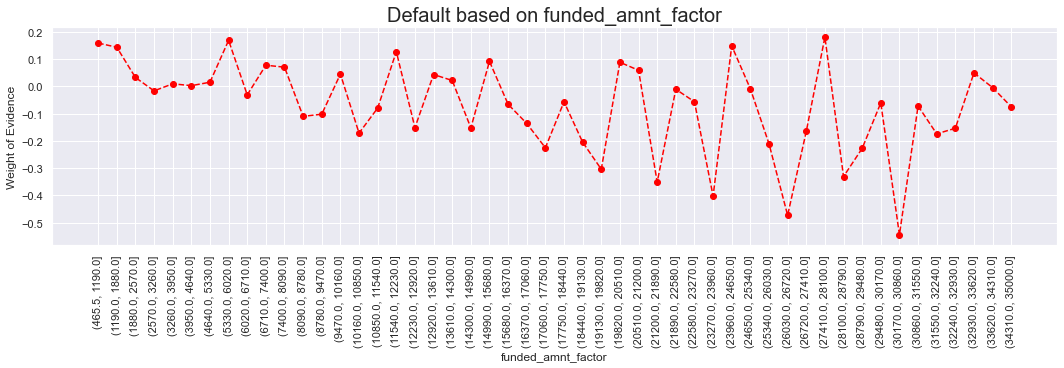

In [127]:
woe_graph(df_temp, rot=90)

funded_amnt variable (exclude from model)
- no clear pattern between independent and woe 
- woe varies greatly
- not to use this in the PD model
- no dummy variables 

In [128]:
#mths_since_earliest_cr_line
#installment
#delinq_2yrs
#inq_last_6mths
#open_acc
#pub_rec
#total_acc
#acc_now_delinq

df_inputs_prepr['mths_since_earliest_cr_line'].value_counts()

206.0    2909
208.0    2908
218.0    2768
196.0    2754
217.0    2681
         ... 
581.0      17
580.0      14
555.0      12
74.0        7
73.0        2
Name: mths_since_earliest_cr_line, Length: 516, dtype: int64

In [129]:
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)

In [130]:
df_inputs_prepr['mths_since_earliest_cr_line_factor']

427211    (363.94, 375.68]
206088     (234.8, 246.54]
136020    (316.98, 328.72]
412305     (223.06, 234.8]
36159      (223.06, 234.8]
                ...       
259178    (258.28, 270.02]
365838     (164.36, 176.1]
131932    (152.62, 164.36]
146867    (246.54, 258.28]
121958    (363.94, 375.68]
Name: mths_since_earliest_cr_line_factor, Length: 373028, dtype: category
Categories (50, interval[float64]): [(-0.587, 11.74] < (11.74, 23.48] < (23.48, 35.22] < (35.22, 46.96] ... (540.04, 551.78] < (551.78, 563.52] < (563.52, 575.26] < (575.26, 587.0]]

In [131]:
df_temp = continuous_woe(df_inputs_prepr, df_targets_prepr, 'mths_since_earliest_cr_line_factor')
df_temp

,mths_since_earliest_cr_line_factor,n_obs,prop_good_bad,n_obs_%,n_good,n_bad,%_good,%_bad,woe,iv
0,"(-0.587, 11.74]",24,0.875000,0.000064,21.0,3.0,0.000063,0.000074,-0.151835,0.016273
1,"(11.74, 23.48]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.016273
2,"(23.48, 35.22]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.016273
3,"(35.22, 46.96]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.016273
4,"(46.96, 58.7]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.016273
5,"(58.7, 70.44]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.016273
6,"(70.44, 82.18]",722,0.898892,0.001936,649.0,73.0,0.001953,0.001790,0.087228,0.016273
7,"(82.18, 93.92]",1929,0.884914,0.005171,1707.0,222.0,0.005138,0.005444,-0.057930,0.016273
8,"(93.92, 105.66]",2817,0.857295,0.007552,2415.0,402.0,0.007269,0.009858,-0.304742,0.016273
9,"(105.66, 117.4]",5092,0.871170,0.013650,4436.0,656.0,0.013351,0.016087,-0.186397,0.016273


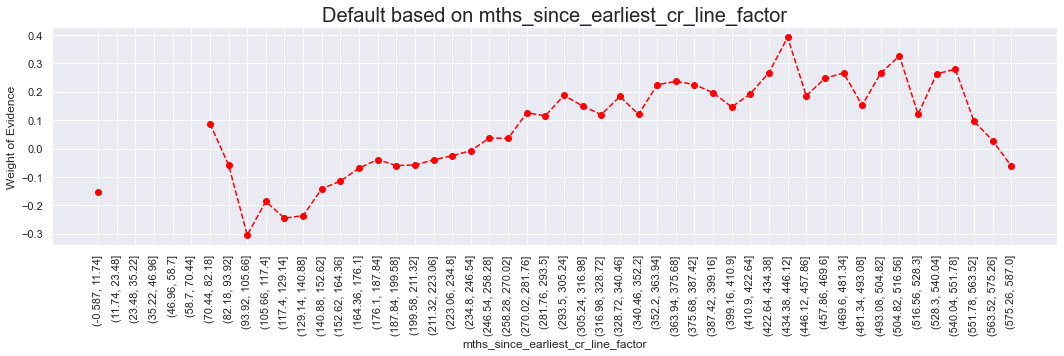

In [132]:
woe_graph(df_temp, rot=90)

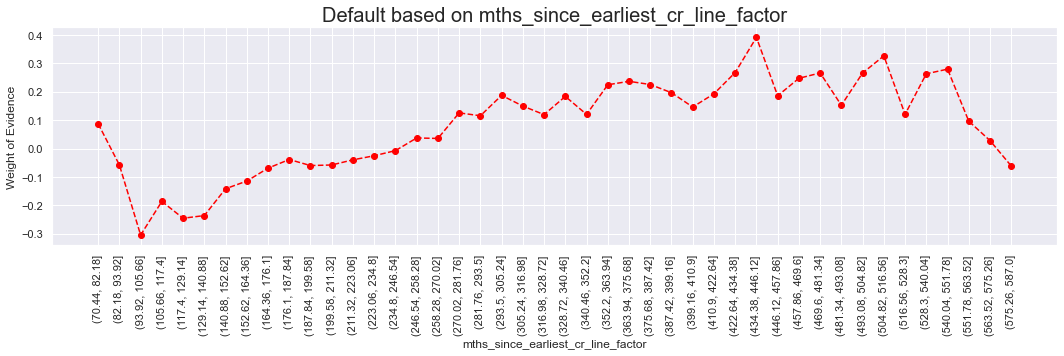

In [133]:
woe_graph(df_temp.iloc[6:, :], rot=90)

In [134]:
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140,165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-211'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165,212)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:212-246'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(212,247)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:247-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(247,271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271,353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

In [135]:
#installment
df_inputs_prepr['installment'].value_counts()

327.34    992
336.90    927
332.10    786
392.81    688
491.01    685
         ... 
510.80      1
158.96      1
314.41      1
518.95      1
256.00      1
Name: installment, Length: 51429, dtype: int64

In [136]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
df_inputs_prepr['installment_factor']

427211    (740.716, 768.603]
206088     (322.42, 350.307]
136020    (629.171, 657.057]
412305    (601.284, 629.171]
36159     (266.648, 294.534]
                 ...        
259178    (155.102, 182.988]
365838    (657.057, 684.944]
131932    (657.057, 684.944]
146867    (489.739, 517.625]
121958    (461.852, 489.739]
Name: installment_factor, Length: 373028, dtype: category
Categories (50, interval[float64]): [(14.276, 43.556] < (43.556, 71.443] < (71.443, 99.329] < (99.329, 127.216] ... (1298.444, 1326.331] < (1326.331, 1354.217] < (1354.217, 1382.104] < (1382.104, 1409.99]]

In [137]:
df_temp = continuous_woe(df_inputs_prepr, df_targets_prepr, 'installment_factor')
df_temp

,installment_factor,n_obs,prop_good_bad,n_obs_%,n_good,n_bad,%_good,%_bad,woe,iv
0,"(14.276, 43.556]",1812,0.906181,0.004858,1642.0,170.0,0.004942,0.004169,0.170127,0.013497
1,"(43.556, 71.443]",4841,0.897542,0.012978,4345.0,496.0,0.013078,0.012163,0.072460,0.013497
2,"(71.443, 99.329]",6824,0.893025,0.018294,6094.0,730.0,0.018342,0.017902,0.024270,0.013497
3,"(99.329, 127.216]",9138,0.890348,0.024497,8136.0,1002.0,0.024488,0.024572,-0.003444,0.013497
4,"(127.216, 155.102]",10040,0.896514,0.026915,9001.0,1039.0,0.027091,0.025479,0.061332,0.013497
5,"(155.102, 182.988]",16816,0.894208,0.045080,15037.0,1779.0,0.045258,0.043626,0.036717,0.013497
6,"(182.988, 210.875]",17216,0.904798,0.046152,15577.0,1639.0,0.046883,0.040193,0.153964,0.013497
7,"(210.875, 238.761]",15090,0.900398,0.040453,13587.0,1503.0,0.040894,0.036858,0.103905,0.013497
8,"(238.761, 266.648]",18842,0.901391,0.050511,16984.0,1858.0,0.051118,0.045564,0.115026,0.013497
9,"(266.648, 294.534]",20100,0.891095,0.053883,17911.0,2189.0,0.053908,0.053681,0.004225,0.013497


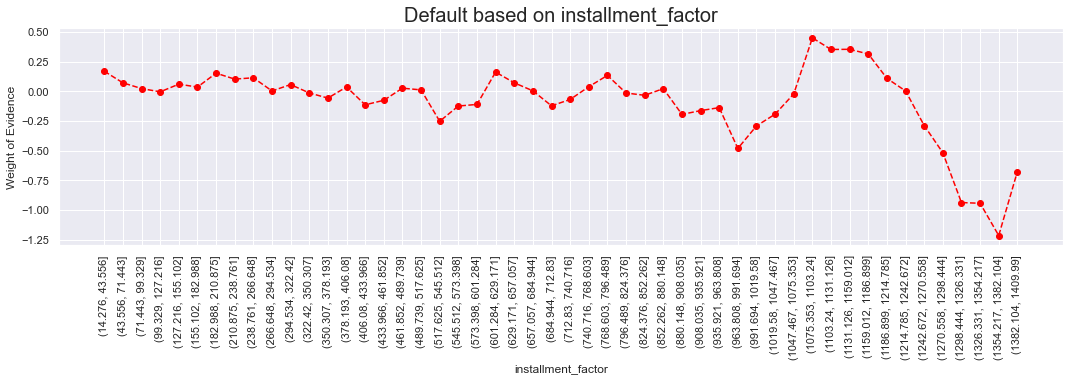

In [138]:
woe_graph(df_temp, rot=90) 

In [139]:
#delinq_2yrs
df_inputs_prepr['delinq_2yrs'].unique()

array([ 0.,  1.,  4.,  2.,  5.,  3.,  6.,  9.,  8.,  7., 11., 24., 10.,
       12., 18., 13., 14., 17., 19., 15., 16., 22., 21., 29.])

In [140]:
df_temp = continuous_woe(df_inputs_prepr, df_targets_prepr, 'delinq_2yrs')
df_temp

,delinq_2yrs,n_obs,prop_good_bad,n_obs_%,n_good,n_bad,%_good,%_bad,woe,iv
0,0.0,306417,0.890499,0.821432,272864.0,33553.0,0.821261,0.822821,-0.001898,inf
1,1.0,44927,0.893249,0.120439,40131.0,4796.0,0.120786,0.117612,0.026622,inf
2,2.0,13118,0.889007,0.035166,11662.0,1456.0,0.035100,0.035706,-0.017102,inf
3,3.0,4550,0.883297,0.012197,4019.0,531.0,0.012096,0.013022,-0.073719,inf
4,4.0,1868,0.898822,0.005008,1679.0,189.0,0.005053,0.004635,0.086462,inf
5,5.0,966,0.881988,0.002590,852.0,114.0,0.002564,0.002796,-0.086357,inf
6,6.0,501,0.902196,0.001343,452.0,49.0,0.001360,0.001202,0.124117,inf
7,7.0,279,0.860215,0.000748,240.0,39.0,0.000722,0.000956,-0.280668,inf
8,8.0,148,0.905405,0.000397,134.0,14.0,0.000403,0.000343,0.161037,inf
9,9.0,89,0.887640,0.000239,79.0,10.0,0.000238,0.000245,-0.030882,inf


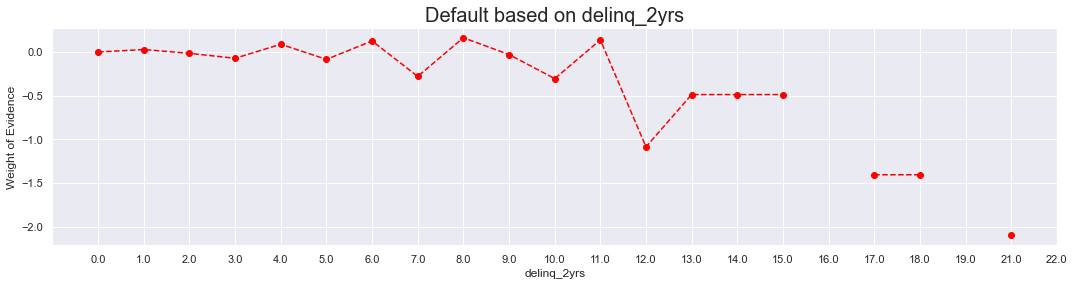

In [141]:
woe_graph(df_temp)

In [142]:
#0, 1, 2, 3+

df_inputs_prepr['delinq_2yrs:0'] = np.where(df_inputs_prepr['delinq_2yrs']==0, 1,0)
df_inputs_prepr['delinq_2yrs:1'] = np.where(df_inputs_prepr['delinq_2yrs'] ==1, 1,0)
df_inputs_prepr['delinq_2yrs:2'] = np.where(df_inputs_prepr['delinq_2yrs']==2, 1,0)
df_inputs_prepr['delinq_2yrs:>=3'] = np.where(df_inputs_prepr['delinq_2yrs']>=3, 1,0) 

In [143]:
#inq_last_6mths
df_inputs_prepr['inq_last_6mths'].unique()

array([ 1.,  2.,  3.,  0.,  4.,  5.,  6.,  7.,  8.,  9., 12., 28., 11.,
       15., 14., 13., 10., 20., 16., 24., 17., 33., 18., 31., 19., 25.,
       27., 32.])

In [144]:
df_temp = continuous_woe(df_inputs_prepr, df_targets_prepr, 'inq_last_6mths')
df_temp

C:\Users\byulc\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,inq_last_6mths,n_obs,prop_good_bad,n_obs_%,n_good,n_bad,%_good,%_bad,woe,iv
0,0.0,193232,0.908395,0.518009,175531.0,17701.0,0.528310,0.434082,0.196450,inf
1,1.0,104163,0.884950,0.279236,92179.0,11984.0,0.277439,0.293884,-0.057585,inf
2,2.0,46214,0.864197,0.123889,39938.0,6276.0,0.120205,0.153907,-0.247150,inf
3,3.0,20040,0.839671,0.053723,16827.0,3213.0,0.050646,0.078792,-0.441965,inf
4,4.0,5810,0.848365,0.015575,4929.0,881.0,0.014835,0.021605,-0.375911,inf
5,5.0,2217,0.824989,0.005943,1829.0,388.0,0.005505,0.009515,-0.547226,inf
6,6.0,977,0.788127,0.002619,770.0,207.0,0.002318,0.005076,-0.784073,inf
7,7.0,159,0.679245,0.000426,108.0,51.0,0.000325,0.001251,-1.347439,inf
8,8.0,101,0.643564,0.000271,65.0,36.0,0.000196,0.000883,-1.506877,inf
9,9.0,43,0.674419,0.000115,29.0,14.0,0.000087,0.000343,-1.369506,inf


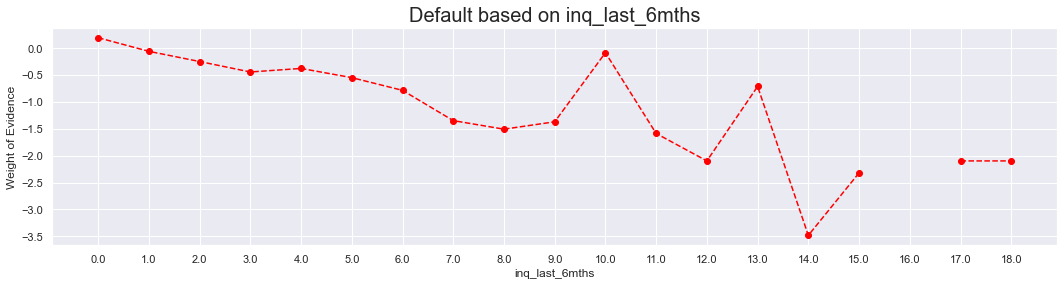

In [145]:
woe_graph(df_temp)

In [146]:
#0, 1, 2, 3-5, 6+

df_inputs_prepr['inq_last_6mths:0'] = np.where(df_inputs_prepr['inq_last_6mths']==0, 1,0)
df_inputs_prepr['inq_last_6mths:1'] = np.where(df_inputs_prepr['inq_last_6mths'] ==1, 1,0)
df_inputs_prepr['inq_last_6mths:2'] = np.where(df_inputs_prepr['inq_last_6mths']==2, 1,0)
df_inputs_prepr['inq_last_6mths:3-5'] = np.where(((df_inputs_prepr['inq_last_6mths']>=3) & (df_inputs_prepr['inq_last_6mths']<=5)), 1,0) 
df_inputs_prepr['inq_last_6mths:>=6'] = np.where(df_inputs_prepr['inq_last_6mths']>=6, 1,0)

In [147]:
#open_acc
len(df_inputs_prepr['open_acc'].unique())

61

In [148]:
df_temp = continuous_woe(df_inputs_prepr, df_targets_prepr, 'open_acc')
df_temp

C:\Users\byulc\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,open_acc,n_obs,prop_good_bad,n_obs_%,n_good,n_bad,%_good,%_bad,woe,iv
0,0.0,29,0.758621,0.000078,22.0,7.0,0.000066,0.000172,-0.952613,inf
1,1.0,110,0.872727,0.000295,96.0,14.0,0.000289,0.000343,-0.172454,inf
2,2.0,1456,0.845467,0.003903,1231.0,225.0,0.003705,0.005518,-0.398263,inf
3,3.0,4378,0.873687,0.011736,3825.0,553.0,0.011512,0.013561,-0.163789,inf
4,4.0,10028,0.891504,0.026883,8940.0,1088.0,0.026907,0.026681,0.008449,inf
5,5.0,17141,0.891255,0.045951,15277.0,1864.0,0.045980,0.045711,0.005879,inf
6,6.0,24621,0.892368,0.066003,21971.0,2650.0,0.066128,0.064986,0.017419,inf
7,7.0,30169,0.891544,0.080876,26897.0,3272.0,0.080954,0.080239,0.008868,inf
8,8.0,33579,0.891033,0.090017,29920.0,3659.0,0.090053,0.089730,0.003592,inf
9,9.0,35251,0.889195,0.094500,31345.0,3906.0,0.094342,0.095787,-0.015204,inf


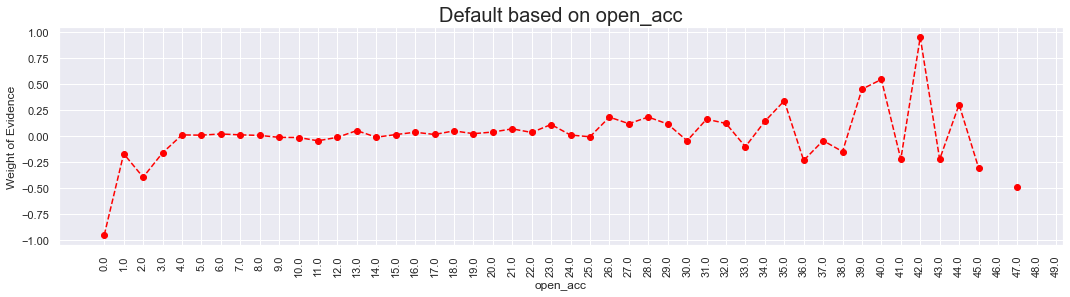

In [149]:
woe_graph(df_temp, rot=90) #exclude since mostly horizontal 

In [150]:
#0, 1-3, 4-12, 13-18, 19-22, 23-29, 30+

df_inputs_prepr['open_acc:0'] = np.where(df_inputs_prepr['open_acc']==0, 1,0)
df_inputs_prepr['open_acc:1-3'] = np.where(((df_inputs_prepr['open_acc'] >=1) &(df_inputs_prepr['open_acc'] <=3)), 1,0)
df_inputs_prepr['open_acc:4-12'] = np.where(((df_inputs_prepr['open_acc'] >=4) &(df_inputs_prepr['open_acc'] <=12)), 1,0)
df_inputs_prepr['open_acc:13-18'] = np.where(((df_inputs_prepr['open_acc'] >=13) &(df_inputs_prepr['open_acc'] <=18)), 1,0)
df_inputs_prepr['open_acc:19-22'] = np.where(((df_inputs_prepr['open_acc'] >=19) &(df_inputs_prepr['open_acc'] <=22)), 1,0)
df_inputs_prepr['open_acc:23-29'] = np.where(((df_inputs_prepr['open_acc'] >=23) &(df_inputs_prepr['open_acc'] <=29)), 1,0)
df_inputs_prepr['open_acc:>=30'] = np.where((df_inputs_prepr['open_acc'] >=30), 1,0)

In [151]:
#pub_rec
df_inputs_prepr['pub_rec'].unique()

array([ 0.,  1.,  3.,  2.,  5.,  4.,  6.,  7.,  9., 10., 13.,  8., 19.,
       11., 17., 34., 16., 12., 40., 18., 54., 15., 63., 21.])

In [152]:
df_temp = continuous_woe(df_inputs_prepr, df_targets_prepr, 'pub_rec')
df_temp

,pub_rec,n_obs,prop_good_bad,n_obs_%,n_good,n_bad,%_good,%_bad,woe,iv
0,0.0,323999,0.889941,0.868565,288340.0,35659.0,0.867840,0.874467,-0.007606,inf
1,1.0,42381,0.893419,0.113613,37864.0,4517.0,0.113962,0.110771,0.028408,inf
2,2.0,4527,0.903247,0.012136,4089.0,438.0,0.012307,0.010741,0.136092,inf
3,3.0,1280,0.920312,0.003431,1178.0,102.0,0.003546,0.002501,0.348856,inf
4,4.0,408,0.924020,0.001094,377.0,31.0,0.001135,0.000760,0.400513,inf
5,5.0,203,0.911330,0.000544,185.0,18.0,0.000557,0.000441,0.232239,inf
6,6.0,117,0.931624,0.000314,109.0,8.0,0.000328,0.000196,0.514161,inf
7,7.0,48,0.958333,0.000129,46.0,2.0,0.000138,0.000049,1.037749,inf
8,8.0,24,1.000000,0.000064,24.0,0.0,0.000072,0.000000,inf,inf
9,9.0,14,0.785714,0.000038,11.0,3.0,0.000033,0.000074,-0.798462,inf


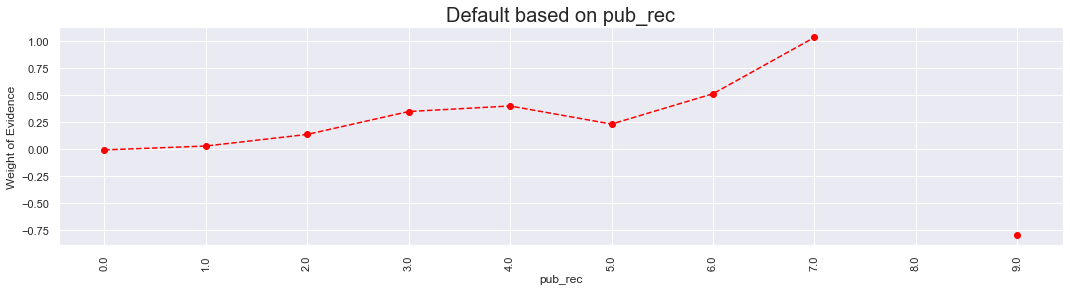

In [153]:
woe_graph(df_temp, rot=90)

In [154]:
#0, 1, 2, 3+

df_inputs_prepr['pub_rec:0'] = np.where(df_inputs_prepr['pub_rec']==0, 1, 0)
df_inputs_prepr['pub_rec:1'] = np.where(df_inputs_prepr['pub_rec']==1, 1, 0)
df_inputs_prepr['pub_rec:2'] = np.where(df_inputs_prepr['pub_rec']==2, 1, 0)
df_inputs_prepr['pub_rec:>=3'] = np.where(df_inputs_prepr['pub_rec']>=3, 1, 0)

In [155]:
#total_acc
df_inputs_prepr['total_acc'].unique()

array([ 32.,  38.,  20.,  13.,  30.,  26.,   6.,  21.,  36.,  48.,  25.,
        33.,  27.,  23.,  44.,   9.,  10.,  18.,  31.,   5.,  19.,  15.,
        39.,  12.,  57.,  24.,  22.,  17.,  16.,  42.,   7.,  29.,  28.,
        34.,  43.,  63.,  14.,  11.,  40.,  37.,  41.,  45.,  35.,  49.,
        54.,  52.,  53.,  60.,  56.,   4.,   8.,  47.,  51.,  46.,  61.,
        59.,  50.,  58.,   0.,  64.,   3.,  55.,  62.,   2.,   1.,  71.,
       105.,  66.,  68.,  69.,  67.,  80.,  70.,  65.,  75.,  85.,  93.,
        83.,  73.,  78.,  81.,  74.,  84.,  77.,  89.,  87.,  72.,  76.,
       117.,  90.,  95.,  79.,  91., 121., 119., 100., 118.,  86., 102.,
        82.,  96.,  92., 116.,  94.,  98.,  88., 150., 106., 124.,  97.,
       101.,  99.])

In [156]:
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)

In [157]:
df_inputs_prepr['total_acc_factor']

427211    (30.0, 33.0]
206088    (36.0, 39.0]
136020    (18.0, 21.0]
412305    (12.0, 15.0]
36159     (27.0, 30.0]
              ...     
259178    (18.0, 21.0]
365838    (18.0, 21.0]
131932     (9.0, 12.0]
146867    (36.0, 39.0]
121958    (36.0, 39.0]
Name: total_acc_factor, Length: 373028, dtype: category
Categories (50, interval[float64]): [(-0.15, 3.0] < (3.0, 6.0] < (6.0, 9.0] < (9.0, 12.0] ... (138.0, 141.0] < (141.0, 144.0] < (144.0, 147.0] < (147.0, 150.0]]

In [158]:
df_temp = continuous_woe(df_inputs_prepr, df_targets_prepr, 'total_acc_factor')
df_temp

,total_acc_factor,n_obs,prop_good_bad,n_obs_%,n_good,n_bad,%_good,%_bad,woe,iv
0,"(-0.15, 3.0]",459,0.810458,0.001230,372.0,87.0,0.001120,0.002134,-0.644759,inf
1,"(3.0, 6.0]",6004,0.864757,0.016095,5192.0,812.0,0.015627,0.019913,-0.242371,inf
2,"(6.0, 9.0]",15047,0.873131,0.040337,13138.0,1909.0,0.039543,0.046814,-0.168816,inf
3,"(9.0, 12.0]",25169,0.881283,0.067472,22181.0,2988.0,0.066760,0.073275,-0.093113,inf
4,"(12.0, 15.0]",33651,0.881281,0.090210,29656.0,3995.0,0.089258,0.097969,-0.093124,inf
5,"(15.0, 18.0]",38711,0.887267,0.103775,34347.0,4364.0,0.103377,0.107018,-0.034619,inf
6,"(18.0, 21.0]",40599,0.886155,0.108836,35977.0,4622.0,0.108283,0.113345,-0.045693,inf
7,"(21.0, 24.0]",40163,0.891492,0.107668,35805.0,4358.0,0.107765,0.106871,0.008329,inf
8,"(24.0, 27.0]",36286,0.895442,0.097274,32492.0,3794.0,0.097794,0.093040,0.049828,inf
9,"(27.0, 30.0]",31775,0.899103,0.085181,28569.0,3206.0,0.085986,0.078621,0.089553,inf


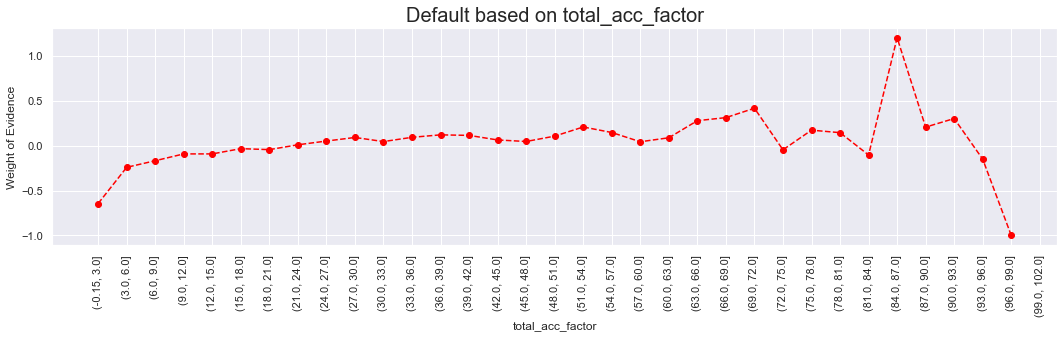

In [159]:
woe_graph(df_temp, rot=90)

In [160]:
#<6
#6-15
#15-18
#18-21
#21-24
#24-33
#33-51
# >=51

df_inputs_prepr['total_acc:<6'] = np.where(df_inputs_prepr['total_acc']<6, 1, 0)
df_inputs_prepr['total_acc:6-14'] = np.where(((df_inputs_prepr['total_acc']>=6) & (df_inputs_prepr['total_acc']<15)), 1, 0)
df_inputs_prepr['total_acc:15-17']= np.where(((df_inputs_prepr['total_acc']>=15) & (df_inputs_prepr['total_acc']<18)), 1, 0)
df_inputs_prepr['total_acc:18-20']= np.where(((df_inputs_prepr['total_acc']>=18) & (df_inputs_prepr['total_acc']<21)), 1, 0)
df_inputs_prepr['total_acc:21-23']= np.where(((df_inputs_prepr['total_acc']>=21) & (df_inputs_prepr['total_acc']<24)), 1, 0)
df_inputs_prepr['total_acc:24-32']= np.where(((df_inputs_prepr['total_acc']>=24) & (df_inputs_prepr['total_acc']<33)), 1, 0)
df_inputs_prepr['total_acc:33-51']= np.where(((df_inputs_prepr['total_acc']>=33) & (df_inputs_prepr['total_acc']<51)), 1, 0)
df_inputs_prepr['total_acc:>51'] = np.where(df_inputs_prepr['total_acc']>=51, 1, 0)

In [161]:
#acc_now_delinq

df_inputs_prepr['acc_now_delinq'].unique()

array([0., 1., 2., 3., 4., 5.])

In [162]:
df_temp = continuous_woe(df_inputs_prepr, df_targets_prepr, 'acc_now_delinq')
df_temp

,acc_now_delinq,n_obs,prop_good_bad,n_obs_%,n_good,n_bad,%_good,%_bad,woe,iv
0,0.0,371682,0.890648,0.996392,331038.0,40644.0,0.996352,0.996714,-0.000363,inf
1,1.0,1263,0.899446,0.003386,1136.0,127.0,0.003419,0.003114,0.093337,inf
2,2.0,70,0.928571,0.000188,65.0,5.0,0.000196,0.000123,0.467204,inf
3,3.0,7,0.857143,0.000019,6.0,1.0,0.000018,0.000025,-0.305986,inf
4,4.0,4,1.000000,0.000011,4.0,0.0,0.000012,0.000000,inf,inf
5,5.0,2,0.500000,0.000005,1.0,1.0,0.000003,0.000025,-2.097745,inf


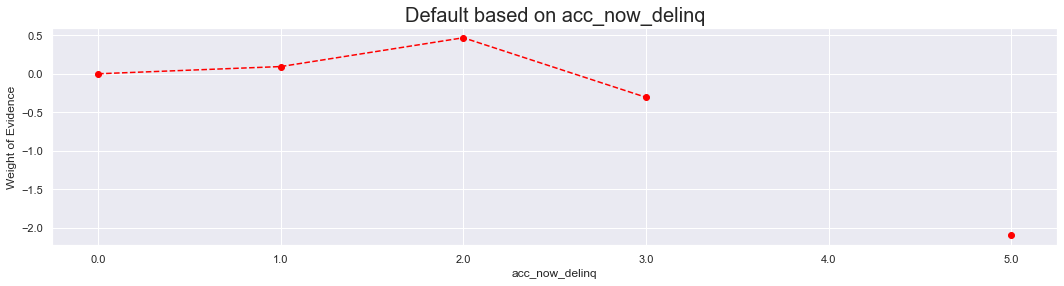

In [163]:
woe_graph(df_temp)

In [164]:
#0, >=1
df_inputs_prepr['acc_now_delinq:0'] = np.where(df_inputs_prepr['acc_now_delinq']==0, 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where(df_inputs_prepr['acc_now_delinq'] >=1, 1,0)

In [165]:
#annual_income
df_inputs_prepr['annual_inc'].value_counts()

60000.00     14346
50000.00     12670
65000.00     10569
40000.00     10306
70000.00      9957
             ...  
204855.00        1
105014.19        1
75861.42         1
20404.00         1
94672.00         1
Name: annual_inc, Length: 26893, dtype: int64

In [166]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)

In [167]:
df_inputs_prepr['annual_inc_factor']

427211    (-5243.882, 144693.64]
206088    (-5243.882, 144693.64]
136020    (-5243.882, 144693.64]
412305    (-5243.882, 144693.64]
36159     (-5243.882, 144693.64]
                   ...          
259178    (-5243.882, 144693.64]
365838    (-5243.882, 144693.64]
131932    (-5243.882, 144693.64]
146867    (-5243.882, 144693.64]
121958    (-5243.882, 144693.64]
Name: annual_inc_factor, Length: 373028, dtype: category
Categories (50, interval[float64]): [(-5243.882, 144693.64] < (144693.64, 287491.28] < (287491.28, 430288.92] < (430288.92, 573086.56] ... (6570587.44, 6713385.08] < (6713385.08, 6856182.72] < (6856182.72, 6998980.36] < (6998980.36, 7141778.0]]

In [168]:
df_temp = continuous_woe(df_inputs_prepr, df_targets_prepr, 'annual_inc_factor')
df_temp

,annual_inc_factor,n_obs,prop_good_bad,n_obs_%,n_good,n_bad,%_good,%_bad,woe,iv
0,"(-5243.882, 144693.64]",351904,0.888566,0.943372,312690.0,39214.0,0.941129,0.961646,-0.021567,inf
1,"(144693.64, 287491.28]",19004,0.925437,0.050945,17587.0,1417.0,0.052933,0.034749,0.420873,inf
2,"(287491.28, 430288.92]",1525,0.930492,0.004088,1419.0,106.0,0.004271,0.002599,0.496524,inf
3,"(430288.92, 573086.56]",332,0.939759,0.000890,312.0,20.0,0.000939,0.000490,0.649526,inf
4,"(573086.56, 715884.2]",112,0.883929,0.000300,99.0,13.0,0.000298,0.000319,-0.067574,inf
5,"(715884.2, 858681.84]",65,0.892308,0.000174,58.0,7.0,0.000175,0.000172,0.016788,inf
6,"(858681.84, 1001479.48]",39,0.974359,0.000105,38.0,1.0,0.000114,0.000025,1.539841,inf
7,"(1001479.48, 1144277.12]",10,1.000000,0.000027,10.0,0.0,0.000030,0.000000,inf,inf
8,"(1144277.12, 1287074.76]",12,1.000000,0.000032,12.0,0.0,0.000036,0.000000,inf,inf
9,"(1287074.76, 1429872.4]",6,1.000000,0.000016,6.0,0.0,0.000018,0.000000,inf,inf


In [169]:
#94% of observation is within the first bucket 
#investigate lower range - put aside people with very high income
#create 1 dummies with very large 

#first use pd.cut with bin size of 100

In [170]:
df_temp = continuous_woe(df_inputs_prepr, df_targets_prepr, 'annual_inc_factor')
df_temp

,annual_inc_factor,n_obs,prop_good_bad,n_obs_%,n_good,n_bad,%_good,%_bad,woe,iv
0,"(-5243.882, 144693.64]",351904,0.888566,0.943372,312690.0,39214.0,0.941129,0.961646,-0.021567,inf
1,"(144693.64, 287491.28]",19004,0.925437,0.050945,17587.0,1417.0,0.052933,0.034749,0.420873,inf
2,"(287491.28, 430288.92]",1525,0.930492,0.004088,1419.0,106.0,0.004271,0.002599,0.496524,inf
3,"(430288.92, 573086.56]",332,0.939759,0.000890,312.0,20.0,0.000939,0.000490,0.649526,inf
4,"(573086.56, 715884.2]",112,0.883929,0.000300,99.0,13.0,0.000298,0.000319,-0.067574,inf
5,"(715884.2, 858681.84]",65,0.892308,0.000174,58.0,7.0,0.000175,0.000172,0.016788,inf
6,"(858681.84, 1001479.48]",39,0.974359,0.000105,38.0,1.0,0.000114,0.000025,1.539841,inf
7,"(1001479.48, 1144277.12]",10,1.000000,0.000027,10.0,0.0,0.000030,0.000000,inf,inf
8,"(1144277.12, 1287074.76]",12,1.000000,0.000032,12.0,0.0,0.000036,0.000000,inf,inf
9,"(1287074.76, 1429872.4]",6,1.000000,0.000016,6.0,0.0,0.000018,0.000000,inf,inf


In [171]:
#even with 100 bins, the first 2 bins capture most 
#split the large starting with the 3rd bin: ~$140thd treshold 

#investigate incomes lower than $140thd

df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc']<=140000]

In [172]:
df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)

<ipython-input-172-b200207a1c0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)


In [173]:
df_inputs_prepr_temp['annual_inc_factor']

427211     (76472.16, 79234.24]
206088    (109617.12, 112379.2]
136020      (81996.32, 84758.4]
412305      (40565.12, 43327.2]
36159      (93044.64, 95806.72]
                  ...          
259178      (70948.0, 73710.08]
365838      (70948.0, 73710.08]
131932     (79234.24, 81996.32]
146867      (68185.92, 70948.0]
121958      (40565.12, 43327.2]
Name: annual_inc_factor, Length: 351062, dtype: category
Categories (50, interval[float64]): [(1757.896, 4658.08] < (4658.08, 7420.16] < (7420.16, 10182.24] < (10182.24, 12944.32] ... (128951.68, 131713.76] < (131713.76, 134475.84] < (134475.84, 137237.92] < (137237.92, 140000.0]]

In [174]:
df_temp = continuous_woe(df_inputs_prepr_temp, df_targets_prepr[df_inputs_prepr_temp.index], 'annual_inc_factor')
df_temp

,annual_inc_factor,n_obs,prop_good_bad,n_obs_%,n_good,n_bad,%_good,%_bad,woe,iv
0,"(1757.896, 4658.08]",15,0.800000,0.000043,12.0,3.0,0.000038,0.000077,-0.689458,0.049818
1,"(4658.08, 7420.16]",40,0.750000,0.000114,30.0,10.0,0.000096,0.000256,-0.977140,0.049818
2,"(7420.16, 10182.24]",287,0.874564,0.000818,251.0,36.0,0.000805,0.000920,-0.133818,0.049818
3,"(10182.24, 12944.32]",547,0.828154,0.001558,453.0,94.0,0.001452,0.002402,-0.503155,0.049818
4,"(12944.32, 15706.4]",1210,0.830579,0.003447,1005.0,205.0,0.003222,0.005238,-0.486019,0.049818
5,"(15706.4, 18468.48]",1522,0.847569,0.004335,1290.0,232.0,0.004136,0.005928,-0.360092,0.049818
6,"(18468.48, 21230.56]",2928,0.855533,0.008340,2505.0,423.0,0.008031,0.010809,-0.297080,0.049818
7,"(21230.56, 23992.64]",2495,0.844489,0.007107,2107.0,388.0,0.006755,0.009914,-0.383737,0.049818
8,"(23992.64, 26754.72]",7016,0.848632,0.019985,5954.0,1062.0,0.019088,0.027137,-0.351843,0.049818
9,"(26754.72, 29516.8]",5643,0.857345,0.016074,4838.0,805.0,0.015510,0.020570,-0.282338,0.049818


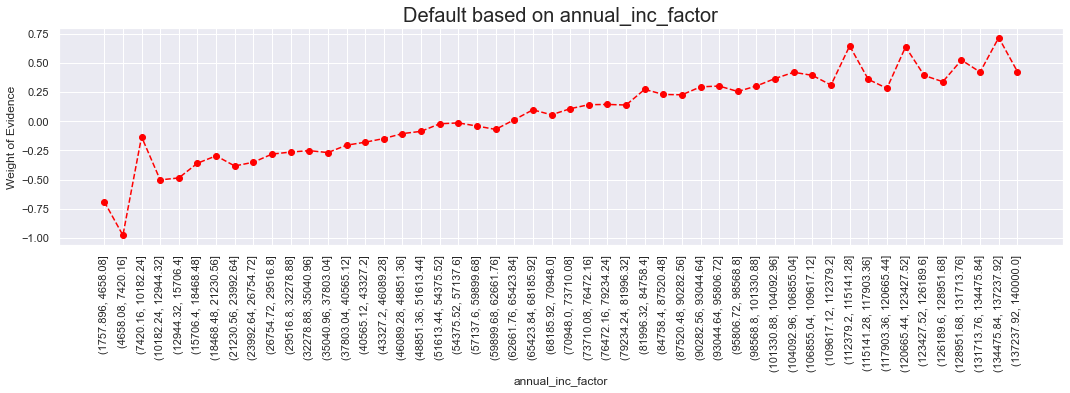

In [175]:
woe_graph(df_temp, rot=90) #

In [176]:
#start with <=20thd
#split by $10thd interval
#100thd above, much smaller n_obs hence split by $20thd interval (e.g. $100-120, 120-140)
#>140thd

df_inputs_prepr['annual_inc:<20K'] = np.where(df_inputs_prepr['annual_inc']<=20000, 1,0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] >20000) & (df_inputs_prepr['annual_inc'] <=30000),1,0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] >30000 ) & ( df_inputs_prepr['annual_inc'] <=40000),1,0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] >40000 ) & ( df_inputs_prepr['annual_inc'] <=50000),1,0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] >50000 ) & ( df_inputs_prepr['annual_inc'] <=60000),1,0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] >60000 ) & ( df_inputs_prepr['annual_inc'] <=70000),1,0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] >70000 ) & ( df_inputs_prepr['annual_inc'] <=80000),1,0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] >80000 ) & ( df_inputs_prepr['annual_inc'] <=90000),1,0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] >90000 ) & ( df_inputs_prepr['annual_inc'] <=100000),1,0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] >100000 ) & (df_inputs_prepr['annual_inc'] <=120000),1,0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] >120000 ) & ( df_inputs_prepr['annual_inc'] <=140000),1,0)
df_inputs_prepr['annual_inc:>140K'] = np.where(df_inputs_prepr['annual_inc']>1400000, 1,0)

In [177]:
df_inputs_prepr_temp = df_inputs_prepr.loc[~df_inputs_prepr['mths_since_last_delinq'].isnull()]
df_inputs_prepr_temp.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,term_int,emp_length_int,mths_since_issue_d,mths_since_earliest_cr_line,earliest_cr_line_date,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,purpose:small_b_edu_moving,purpose:house_other_ren_en_med,purpose:wedd_vaca,purpose:home_imp_maj_pur_car,term:36,term:60,emp_lenght_int:0,emp_lenght_int:1,emp_lenght_int:2_4,emp_lenght_int:5_6,emp_lenght_int:7_9,emp_lenght_int:10,mths_since_issue_d_factor,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-43,mths_since_issue_d:44-49,mths_since_issue_d:50-52,mths_since_issue_d:53-59,mths_since_issue_d:60-72,mths_since_issue_d:>72,int_rate_factor,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,fund

In [178]:
df_inputs_prepr_temp['mths_since_last_delinq'].isnull().sum()

0

In [179]:
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)

<ipython-input-179-30141a624bd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)


In [180]:
df_inputs_prepr_temp['mths_since_last_delinq_factor']

206088     (15.04, 18.8]
136020    (45.12, 48.88]
412305      (3.76, 7.52]
378696     (7.52, 11.28]
159555    (30.08, 33.84]
               ...      
110268     (15.04, 18.8]
119879      (3.76, 7.52]
259178     (7.52, 11.28]
365838     (7.52, 11.28]
121958    (78.96, 82.72]
Name: mths_since_last_delinq_factor, Length: 172843, dtype: category
Categories (50, interval[float64]): [(-0.188, 3.76] < (3.76, 7.52] < (7.52, 11.28] < (11.28, 15.04] ... (172.96, 176.72] < (176.72, 180.48] < (180.48, 184.24] < (184.24, 188.0]]

In [181]:
df_temp = continuous_woe(df_inputs_prepr_temp, df_targets_prepr[df_inputs_prepr_temp.index],'mths_since_last_delinq_factor')

In [182]:
df_temp

,mths_since_last_delinq_factor,n_obs,prop_good_bad,n_obs_%,n_good,n_bad,%_good,%_bad,woe,iv
0,"(-0.188, 3.76]",5277,0.871518,0.030531,4599.0,678.0,0.029814,0.036481,-0.201825,inf
1,"(3.76, 7.52]",11167,0.887615,0.064608,9912.0,1255.0,0.064256,0.067528,-0.049661,inf
2,"(7.52, 11.28]",13306,0.892830,0.076983,11880.0,1426.0,0.077014,0.076729,0.003711,inf
3,"(11.28, 15.04]",13216,0.888847,0.076462,11747.0,1469.0,0.076152,0.079042,-0.037256,inf
4,"(15.04, 18.8]",9337,0.894934,0.054020,8356.0,981.0,0.054169,0.052785,0.025891,inf
5,"(18.8, 22.56]",11641,0.892707,0.067350,10392.0,1249.0,0.067368,0.067205,0.002421,inf
6,"(22.56, 26.32]",10887,0.896298,0.062988,9758.0,1129.0,0.063258,0.060748,0.040483,inf
7,"(26.32, 30.08]",10560,0.895076,0.061096,9452.0,1108.0,0.061274,0.059618,0.027398,inf
8,"(30.08, 33.84]",7576,0.902191,0.043832,6835.0,741.0,0.044309,0.039871,0.105539,inf
9,"(33.84, 37.6]",9795,0.897397,0.056670,8790.0,1005.0,0.056982,0.054076,0.052355,inf


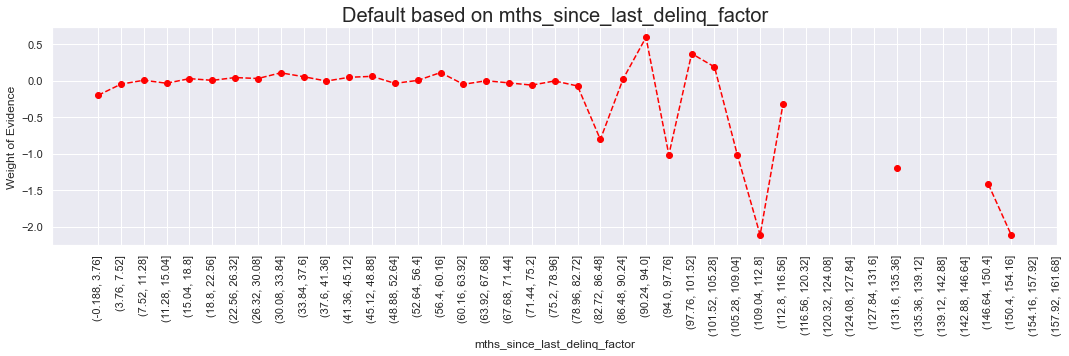

In [183]:
woe_graph(df_temp, rot=90)

In [184]:
#<3
#4-30
#31-60
#61+

df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where(df_inputs_prepr['mths_since_last_delinq'].isnull(), 1,0)
df_inputs_prepr['mths_since_last_delinq:<=3'] = np.where(df_inputs_prepr['mths_since_last_delinq'] <=3, 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where(((df_inputs_prepr['mths_since_last_delinq'] >3) & (df_inputs_prepr['mths_since_last_delinq'] <=30)), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-60'] = np.where(((df_inputs_prepr['mths_since_last_delinq'] >30) & (df_inputs_prepr['mths_since_last_delinq'] <=60)), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=61'] = np.where(df_inputs_prepr['mths_since_last_delinq'] >60, 1, 0)